In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import numpy as np
import graphviz


#Scale 변환: 평균, 표준편차, 기준

from sklearn.preprocessing import StandardScaler

#주성분 분석
from sklearn.decomposition import PCA

#회귀분석
from statsmodels.formula.api import ols
#qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
#선형 모델 formula(y~X1+X2+...)

import statsmodels.formula.api as smf
#평가함수
from statsmodels.tools.eval_measures import rmse
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier as GBC
import seaborn as sns

import statsmodels.formula.api as smf # 선형모델 formula(y ~ x1 +x2+ x3)
import statsmodels.api as sm
# ols Ordinary Least Squares (최소자승법 라이브러리)
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


from statsmodels.api import Logit

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
# 한글 맑은 고딕 적용
matplotlib.rc('font',family='NanumGothic')

# seaborn에서 한글 깨짐 해결:unicode minus 사용 않기 위한 설정(minus 깨짐 현상 방지)
plt.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats
import statsmodels.api as smd
from statsmodels.stats.proportion import proportions_ztest

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,142 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144793 files and d

In [4]:
plt.rc('font', family='NanumBarunGothic') 

## 사전 검사 결과 데이터프레임 불러오기

In [5]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/A3_보험_DataSet/insu_pre_review.csv', engine = 'python', encoding ='EUC-KR')
df

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge
0,C112346,혈액검사,재검,2014-10-09,1,70,165,63,92.0,88.0,80,130,72.0,140.0,NaN,81.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,23.0,20.0,NaN,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,C112350,일반검진,재검,2014-11-18,1,69,178,75,99.0,92.0,80,130,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C112355,일반검진,재검,2015-03-18,1,70,169,69,96.0,88.0,80,120,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C112356,혈액검사,재검,2015-09-28,1,70,165,64,103.0,92.0,80,120,72.0,167.0,0.9,87.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,28.0,32.0,73.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C112358,혈액검사,거절,2015-02-24,1,70,166,73,100.0,91.0,85,130,76.0,205.0,NaN,83.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,40.0,53.0,NaN,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14933,C134246,혈액검사,승인,2015-02-11,2,63,150,53,94.0,80.0,80,120,74.0,238.0,NaN,86.0,13.8,NEGATIVE,42.5,29.0,32.0,89.0,310.0,476.0,10500.0,NaN,NaN,16.0,NaN,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14934,C134250,일반검진,승인,2015-09-16,2,52,164,60,90.0,66.0,80,120,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14935,C134251,일반검진,재검,2015-06-21,2,57,157,48,89.0,72.0,70,110,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14936,C134252,혈액검사,재검,2015-06-26,2,66,150,47,86.0,84.0,100,150,88.0,154.0,1.0,116.0,13.5,NEGATIVE,46.0,30.0,33.0,99.0,142.0,443.0,4000.0,NaN,NaN,36.0,88.0,1,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/A3_보험_DataSet/혈액기존고객.csv', engine = 'python', encoding ='EUC-KR')
df

,Unnamed: 0,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,risk,bmi,whtr
0,0,C112379,혈액검사,재검,2014-12-09,1,69,160,59,84.0,72.0,80,135,66.0,231.0,NaN,103.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.0,29.0,17.0,NaN,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,23.05,0.45
1,1,C112404,혈액검사,재검,2015-03-29,1,69,175,79,101.0,92.0,80,120,70.0,264.0,NaN,74.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,25.0,20.0,156.0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,25.80,0.53
2,4,C112856,혈액검사,재검,2015-08-04,1,62,165,70,96.0,82.0,80,130,64.0,142.0,1.2,84.0,17.4,NEGATIVE,50.5,31.0,34.0,90.0,181.0,561.0,8000.0,36.0,22.0,36.0,174.0,2,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,25.71,0.50
3,5,C112878,혈액검사,승인,2015-08-26,1,62,172,61,90.0,73.0,80,120,60.0,148.0,1.0,87.0,14.1,NEGATIVE,41.4,34.0,34.0,98.0,270.0,421.0,6800.0,32.0,28.0,19.0,65.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,20.62,0.42
4,6,C112881,혈액검사,재검,2015-02-17,1,62,165,72,98.0,88.0,70,120,66.0,182.0,NaN,78.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,21.0,14.0,NaN,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,26.45,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,2076,C134165,혈액검사,재검,2015-01-15,2,48,162,67,101.0,82.0,80,120,68.0,192.0,NaN,89.0,10.0,POSITIVE,35.6,22.0,28.0,78.0,328.0,455.0,4000.0,NaN,14.0,18.0,NaN,6,0,0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,25.53,0.51
1603,2077,C134172,혈액검사,재검,2015-01-09,2,37,160,70,99.0,91.0,80,120,68.0,190.0,NaN,88.0,13.2,POSITIVE,39.4,32.0,34.0,97.0,189.0,406.0,4200.0,32.0,35.0,39.0,NaN,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,27.34,0.57
1604,2078,C134184,혈액검사,승인,2015-08-13,2,53,155,62,94.0,82.0,85,120,64.0,194.0,0.8,85.0,13.4,NEGATIVE,39.8,29.6,33.7,87.9,325.0,453.0,5410.0,17.0,22.0,22.0,248.0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,25.81,0.53
1605,2080,C134197,혈액검사,재검,2014-12-23,1,42,178,70,95.0,86.0,75,115,76.0,152.0,NaN,92.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,15.0,NaN,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,22.09,0.48


In [ ]:
df['bmi'] = (df['weight']/(df['height']/100)**2).round(2)
df['whtr'] = (df['waist']/df['height']).round(2)
df

,Unnamed: 0,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,risk,bmi,whtr
0,0,C112379,혈액검사,재검,2014-12-09,1,69,160,59,84.0,72.0,80,135,66.0,231.0,NaN,103.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.0,29.0,17.0,NaN,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,23.05,0.45
1,1,C112404,혈액검사,재검,2015-03-29,1,69,175,79,101.0,92.0,80,120,70.0,264.0,NaN,74.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,25.0,20.0,156.0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,25.80,0.53
2,4,C112856,혈액검사,재검,2015-08-04,1,62,165,70,96.0,82.0,80,130,64.0,142.0,1.2,84.0,17.4,NEGATIVE,50.5,31.0,34.0,90.0,181.0,561.0,8000.0,36.0,22.0,36.0,174.0,2,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,25.71,0.50
3,5,C112878,혈액검사,승인,2015-08-26,1,62,172,61,90.0,73.0,80,120,60.0,148.0,1.0,87.0,14.1,NEGATIVE,41.4,34.0,34.0,98.0,270.0,421.0,6800.0,32.0,28.0,19.0,65.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,20.62,0.42
4,6,C112881,혈액검사,재검,2015-02-17,1,62,165,72,98.0,88.0,70,120,66.0,182.0,NaN,78.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,21.0,14.0,NaN,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,26.45,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,2076,C134165,혈액검사,재검,2015-01-15,2,48,162,67,101.0,82.0,80,120,68.0,192.0,NaN,89.0,10.0,POSITIVE,35.6,22.0,28.0,78.0,328.0,455.0,4000.0,NaN,14.0,18.0,NaN,6,0,0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,25.53,0.51
1603,2077,C134172,혈액검사,재검,2015-01-09,2,37,160,70,99.0,91.0,80,120,68.0,190.0,NaN,88.0,13.2,POSITIVE,39.4,32.0,34.0,97.0,189.0,406.0,4200.0,32.0,35.0,39.0,NaN,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,27.34,0.57
1604,2078,C134184,혈액검사,승인,2015-08-13,2,53,155,62,94.0,82.0,85,120,64.0,194.0,0.8,85.0,13.4,NEGATIVE,39.8,29.6,33.7,87.9,325.0,453.0,5410.0,17.0,22.0,22.0,248.0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,25.81,0.53
1605,2080,C134197,혈액검사,재검,2014-12-23,1,42,178,70,95.0,86.0,75,115,76.0,152.0,NaN,92.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,15.0,NaN,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,22.09,0.48


In [ ]:
df.drop(['Unnamed: 0'], axis =1, inplace = True)

#  이상치 확인 및 결측치 제거 (필요한 변수만 추출) , 혈액검사 데이터만 추출

In [ ]:
df

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,risk,bmi,whtr
0,C112379,혈액검사,재검,2014-12-09,1,69,160,59,84.0,72.0,80,135,66.0,231.0,NaN,103.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.0,29.0,17.0,NaN,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,23.05,0.45
1,C112404,혈액검사,재검,2015-03-29,1,69,175,79,101.0,92.0,80,120,70.0,264.0,NaN,74.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,25.0,20.0,156.0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,25.80,0.53
2,C112856,혈액검사,재검,2015-08-04,1,62,165,70,96.0,82.0,80,130,64.0,142.0,1.2,84.0,17.4,NEGATIVE,50.5,31.0,34.0,90.0,181.0,561.0,8000.0,36.0,22.0,36.0,174.0,2,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,25.71,0.50
3,C112878,혈액검사,승인,2015-08-26,1,62,172,61,90.0,73.0,80,120,60.0,148.0,1.0,87.0,14.1,NEGATIVE,41.4,34.0,34.0,98.0,270.0,421.0,6800.0,32.0,28.0,19.0,65.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,20.62,0.42
4,C112881,혈액검사,재검,2015-02-17,1,62,165,72,98.0,88.0,70,120,66.0,182.0,NaN,78.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,21.0,14.0,NaN,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,26.45,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,C134165,혈액검사,재검,2015-01-15,2,48,162,67,101.0,82.0,80,120,68.0,192.0,NaN,89.0,10.0,POSITIVE,35.6,22.0,28.0,78.0,328.0,455.0,4000.0,NaN,14.0,18.0,NaN,6,0,0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,25.53,0.51
1603,C134172,혈액검사,재검,2015-01-09,2,37,160,70,99.0,91.0,80,120,68.0,190.0,NaN,88.0,13.2,POSITIVE,39.4,32.0,34.0,97.0,189.0,406.0,4200.0,32.0,35.0,39.0,NaN,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,27.34,0.57
1604,C134184,혈액검사,승인,2015-08-13,2,53,155,62,94.0,82.0,85,120,64.0,194.0,0.8,85.0,13.4,NEGATIVE,39.8,29.6,33.7,87.9,325.0,453.0,5410.0,17.0,22.0,22.0,248.0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,25.81,0.53
1605,C134197,혈액검사,재검,2014-12-23,1,42,178,70,95.0,86.0,75,115,76.0,152.0,NaN,92.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,22.0,15.0,NaN,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,22.09,0.48


In [ ]:
# 혈액검사만 추출
df =df[df['review_cat'] =='혈액검사']

In [ ]:
df.isna().sum()

customer_id            0
review_cat             0
judge                  0
review_date            0
gender                 0
age                    0
height                 0
weight                 0
bust                   1
waist                  1
bp_min                 0
bp_max                 0
pulse_count            1
bt_chol                0
bt_crea              811
bt_gluc                0
bt_hb                446
bt_hbsa                0
bt_hct               446
bt_mch               446
bt_mchc              446
bt_mvc               446
bt_plat              446
bt_rbc               446
bt_wbc               446
bt_rgpt              750
bt_sgot              707
bt_sgpt                0
bt_trig              691
judge_score            0
bp_judge               0
pulse_count_judge      0
bt_chol_judge          0
bt_crea_judge          0
bt_gluc_judge          0
bt_hb_judge            0
bt_hbsa_judge          0
bt_hct_judge           0
bt_mch_judge           0
bt_mchc_judge          0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1607 entries, 0 to 1606
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        1607 non-null   object 
 1   review_cat         1607 non-null   object 
 2   judge              1607 non-null   object 
 3   review_date        1607 non-null   object 
 4   gender             1607 non-null   int64  
 5   age                1607 non-null   int64  
 6   height             1607 non-null   int64  
 7   weight             1607 non-null   int64  
 8   bust               1606 non-null   float64
 9   waist              1606 non-null   float64
 10  bp_min             1607 non-null   int64  
 11  bp_max             1607 non-null   int64  
 12  pulse_count        1606 non-null   float64
 13  bt_chol            1607 non-null   float64
 14  bt_crea            796 non-null    float64
 15  bt_gluc            1607 non-null   float64
 16  bt_hb              1161 

## health_risk 도출 (z 검정)

In [ ]:
def new_hist(data,var):
    plt.hist(data[data[str(var)+"_judge"]==1][var],label = '비정상', alpha = 0.5)
    plt.hist(data[data[str(var)+"_judge"]==0][var],label = '정상', alpha = 0.5)
    plt.legend()
def new_crosstab(data,var) : 
    print(pd.crosstab(index = data[str(var)+"_judge"], columns = data[var]))
    print()
    print(pd.crosstab(index = data[str(var)+"_judge"], columns = data[var],normalize = 'columns').round(3))

In [ ]:

def my_t(data,var):
    k = stats.levene(data[data["'"+str(var)+'_judge']==0][var],data[data["'"+str(var)+'_judge']==1][var])
    t_result = stats.ttest_ind(data[data["'"+str(var)+'_judge']==0][[var]],
                               data[data["'"+str(var)+'_judge']==1][[var]],equal_var=True) # 2 sample 비교 명령어

    t,p = t_result
    print(k,p)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


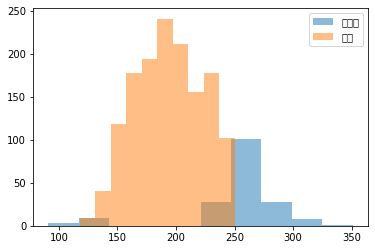

In [ ]:
new_hist(df,'bt_chol')

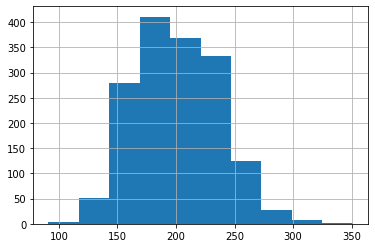

In [ ]:
df['bt_chol'].hist()

In [ ]:
df['bt_chol'].describe()

count    1607.000000
mean      200.456129
std        35.598413
min        91.000000
25%       174.000000
50%       198.000000
75%       226.000000
max       351.000000
Name: bt_chol, dtype: float64

In [ ]:
df.head()

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,risk,bmi,whtr
0,C112379,혈액검사,재검,2014-12-09,1,69,160,59,84.0,72.0,80,135,66.0,231.0,NaN,103.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.0,29.0,17.0,NaN,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,23.05,0.45
1,C112404,혈액검사,재검,2015-03-29,1,69,175,79,101.0,92.0,80,120,70.0,264.0,NaN,74.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,25.0,20.0,156.0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,25.80,0.53
2,C112856,혈액검사,재검,2015-08-04,1,62,165,70,96.0,82.0,80,130,64.0,142.0,1.2,84.0,17.4,NEGATIVE,50.5,31.0,34.0,90.0,181.0,561.0,8000.0,36.0,22.0,36.0,174.0,2,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,25.71,0.50
3,C112878,혈액검사,승인,2015-08-26,1,62,172,61,90.0,73.0,80,120,60.0,148.0,1.0,87.0,14.1,NEGATIVE,41.4,34.0,34.0,98.0,270.0,421.0,6800.0,32.0,28.0,19.0,65.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,20.62,0.42
4,C112881,혈액검사,재검,2015-02-17,1,62,165,72,98.0,88.0,70,120,66.0,182.0,NaN,78.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,21.0,14.0,NaN,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,26.45,0.53


In [ ]:
def z_score(data):
    z_value_column_list = ['bt_chol_z_value','bt_crea_z_value','bt_gluc_z_value','bt_hb_z_value','bt_hct_z_value','bt_mch_z_value','bt_mchc_z_value','bt_mvc_z_value','bt_plat_z_value','bt_rbc_z_value','bt_wbc_z_value','bt_rgpt_z_value','bt_sgot_z_value','bt_sgpt_z_value','bt_trig_z_value']
    blood_test_column_list = ['bt_chol','bt_crea','bt_gluc','bt_hb','bt_hct','bt_mch','bt_mchc','bt_mvc','bt_plat','bt_rbc','bt_wbc','bt_rgpt','bt_sgot','bt_sgpt','bt_trig']

    for i in range(len(z_value_column_list)):
        z_value_column = z_value_column_list[i]
        blood_test_column = blood_test_column_list[i]

        data[z_value_column] = (data[blood_test_column]-data[blood_test_column].mean())/data[blood_test_column].std()


    data['z_count'] = data[z_value_column_list].notnull().sum(1)

    data.fillna({x:0 for x in z_value_column_list}, inplace = True)

    data['z_score'] = (data[z_value_column_list].sum(axis = 1))/data['z_count']

    data.head(5)

In [ ]:
z_score(df)

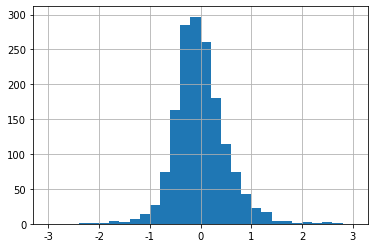

In [ ]:
df['z_score'].hist(range = (-3,3), bins = 30)

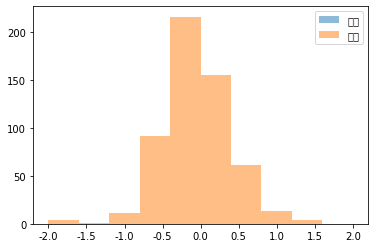

In [ ]:
plt.hist(df[df['judge'] == '거절']['z_score'], label = '거절', alpha = 0.5, range = (-2,2))
plt.hist(df[df['judge'] == '승인']['z_score'], label = '승인', alpha = 0.5, range = (-2,2))

plt.legend()

In [ ]:
df['z_score'].describe()

count    1607.000000
mean       -0.005531
std         0.524265
min        -2.379565
25%        -0.315150
50%        -0.053576
75%         0.266299
max         5.256130
Name: z_score, dtype: float64

 고위험군(거절) 분류 기준 설정

In [ ]:
a = df[df['z_score'] >= 0.75]

In [ ]:
a.to_csv('/content/drive/My Drive/Colab Notebooks/A3_보험_DataSet/기존위험고객군.csv',encoding = 'euckr')

In [ ]:
a.to_excel('/content/drive/My Drive/Colab Notebooks/A3_보험_DataSet/기존위험고객군.xlsx',encoding = 'euckr')

저위험군(할증) 분류 기준 선정

In [ ]:
df[(df['z_score'] <= 0.25) & (df['z_score'] >= -0.25)]

,review_cat,judge,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi,whtr,bt_chol_z_value,bt_crea_z_value,bt_gluc_z_value,bt_hb_z_value,bt_hct_z_value,bt_mch_z_value,bt_mchc_z_value,bt_mvc_z_value,bt_plat_z_value,bt_rbc_z_value,bt_wbc_z_value,bt_rgpt_z_value,bt_sgot_z_value,bt_sgpt_z_value,bt_trig_z_value,z_count,z_score
3,혈액검사,재검,1,70,165,64,103.0,92.0,80,120,72.0,167.0,0.9,87.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,28.0,32.0,73.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.51,0.56,-0.873217,0.253933,-0.255717,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.385086,0.064639,0.258122,-0.618023,7,-0.112168
6,혈액검사,재검,1,69,164,67,98.0,87.0,80,135,70.0,207.0,NaN,89.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,25.0,30.0,NaN,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.91,0.53,0.187523,0.000000,-0.164832,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.121165,-0.089828,0.175248,0.000000,5,-0.002611
11,혈액검사,재검,1,70,171,73,96.0,84.0,80,130,60.0,168.0,NaN,84.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,43.0,57.0,NaN,2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,24.96,0.49,-0.846699,0.000000,-0.392044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.217594,0.836973,1.294046,0.000000,5,0.134937
12,혈액검사,거절,1,70,175,66,98.0,84.0,90,160,72.0,225.0,NaN,91.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,21.0,31.0,NaN,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.55,0.48,0.664856,0.000000,-0.073947,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.048844,-0.295783,0.216685,0.000000,5,0.092593
20,혈액검사,재검,1,69,170,70,102.0,86.0,80,120,72.0,202.0,1.0,111.0,15.0,NEGATIVE,47.4,33.0,32.0,99.0,202.0,453.0,4800.0,34.0,22.0,20.0,70.0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.22,0.51,0.054930,0.771427,0.834899,0.804429,1.252179,1.359842,-0.566682,1.334650,-0.938551,-0.067941,-0.860085,-0.241701,-0.244294,-0.239122,-0.642960,15,0.174068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14929,혈액검사,거절,2,53,158,62,90.0,80.0,85,130,68.0,171.0,NaN,93.0,13.0,NEGATIVE,39.6,30.0,33.0,91.0,278.0,437.0,8800.0,NaN,NaN,18.0,NaN,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.84,0.51,-0.767143,0.000000,0.016937,-0.578253,-0.662425,-0.193003,0.170777,-0.336791,0.366124,-0.456577,1.722276,0.000000,0.000000,-0.321996,0.000000,11,-0.094552
14930,혈액검사,재검,2,50,158,70,100.0,80.0,70,110,64.0,216.0,0.8,92.0,14.3,NEGATIVE,44.8,30.0,32.0,94.0,300.0,477.0,6000.0,NaN,NaN,16.0,209.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,28.04,0.51,0.426189,-0.263561,-0.028505,0.320490,0.613978,-0.193003,-0.566682,0.289999,0.743794,0.515012,-0.085377,0.000000,0.000000,-0.404870,0.512428,13,0.144607
14932,혈액검사,승인,2,27,159,48,82.0,68.0,70,110,62.0,237.0,0.7,83.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,159.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.99,0.43,0.983078,-0.781055,-0.437486,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.612054,0.096821,5,-0.150139
14933,혈액검사,승인,2,63,150,53,94.0,80.0,80,120,74.0,238.0,NaN,86.0,13.8,NEGATIVE,42.5,29.0,32.0,89.0,310.0,476.0,10500.0,NaN,NaN,16.0,NaN,1,0,0,0.0,0.0,0.0,0.0

## 거절 고객 위험군 중 저위험군(할증), 고위험군(거절) 분류

In [ ]:
df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/A3_보험_DataSet/reject_risk.csv', engine = 'python', encoding ='EUC-KR')
df1

,Unnamed: 0,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi,whtr,risk
0,0,C112358,혈액검사,거절,2015-02-24,1,70,166,73,100.0,91.0,85,130,76.0,205.0,NaN,83.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,40.0,53.0,NaN,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26.49,0.55,1
1,1,C112374,혈액검사,거절,2015-01-22,1,70,175,66,98.0,84.0,90,160,72.0,225.0,NaN,91.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,21.0,31.0,NaN,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.55,0.48,1
2,2,C112426,혈액검사,거절,2014-10-16,1,68,170,72,96.0,90.0,80,135,68.0,245.0,NaN,83.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,18.0,17.0,206.0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24.91,0.53,1
3,3,C112427,혈액검사,거절,2015-03-19,1,68,169,57,97.0,81.0,80,130,78.0,188.0,NaN,131.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,23.0,24.0,NaN,1,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.96,0.48,1
4,4,C112431,혈액검사,거절,2015-04-14,1,68,165,70,97.0,89.0,80,120,74.0,190.0,1.0,88.0,15.1,NEGATIVE,44.9,32.0,34.0,94.0,248.0,477.0,8400.0,147.0,82.0,123.0,135.0,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,25.71,0.54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,2122,C134162,혈액검사,거절,2014-11-09,2,47,152,50,93.0,77.0,70,110,72.0,166.0,NaN,104.0,12.0,NEGATIVE,37.4,31.0,32.0,98.0,235.0,380.0,6400.0,NaN,NaN,20.0,NaN,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.64,0.51,1
2123,2123,C134201,혈액검사,거절,2015-02-16,1,48,160,58,91.0,74.0,80,130,68.0,226.0,NaN,103.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,21.0,21.0,NaN,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.66,0.46,1
2124,2124,C134203,혈액검사,거절,2015-09-07,1,51,165,65,98.0,87.0,90,150,76.0,271.0,0.8,130.0,16.8,NEGATIVE,47.9,30.0,35.0,85.0,298.0,560.0,5600.0,208.0,37.0,31.0,376.0,4,1,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,23.88,0.53,1
2125,2125,C134204,혈액검사,거절,2015-03-10,1,54,180,83,95.0,86.0,80,120,72.0,158.0,NaN,123.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,19.0,22.0,NaN,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.62,0.48,1


In [ ]:
df1.drop('Unnamed: 0', axis = 1, inplace = True)
df1.drop(['customer_id', 'review_date'], axis =1, inplace = True)

In [ ]:
df1

,review_cat,judge,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi,whtr,risk
0,혈액검사,거절,1,70,166,73,100.0,91.0,85,130,76.0,205.0,NaN,83.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,40.0,53.0,NaN,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26.49,0.55,1
1,혈액검사,거절,1,70,175,66,98.0,84.0,90,160,72.0,225.0,NaN,91.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,21.0,31.0,NaN,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.55,0.48,1
2,혈액검사,거절,1,68,170,72,96.0,90.0,80,135,68.0,245.0,NaN,83.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,18.0,17.0,206.0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24.91,0.53,1
3,혈액검사,거절,1,68,169,57,97.0,81.0,80,130,78.0,188.0,NaN,131.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,23.0,24.0,NaN,1,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.96,0.48,1
4,혈액검사,거절,1,68,165,70,97.0,89.0,80,120,74.0,190.0,1.0,88.0,15.1,NEGATIVE,44.9,32.0,34.0,94.0,248.0,477.0,8400.0,147.0,82.0,123.0,135.0,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,25.71,0.54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,혈액검사,거절,2,47,152,50,93.0,77.0,70,110,72.0,166.0,NaN,104.0,12.0,NEGATIVE,37.4,31.0,32.0,98.0,235.0,380.0,6400.0,NaN,NaN,20.0,NaN,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.64,0.51,1
2123,혈액검사,거절,1,48,160,58,91.0,74.0,80,130,68.0,226.0,NaN,103.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,21.0,21.0,NaN,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.66,0.46,1
2124,혈액검사,거절,1,51,165,65,98.0,87.0,90,150,76.0,271.0,0.8,130.0,16.8,NEGATIVE,47.9,30.0,35.0,85.0,298.0,560.0,5600.0,208.0,37.0,31.0,376.0,4,1,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,23.88,0.53,1
2125,혈액검사,거절,1,54,180,83,95.0,86.0,80,120,72.0,158.0,NaN,123.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,19.0,22.0,NaN,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.62,0.48,1


In [ ]:
z_score(df1)

In [ ]:
df1

,review_cat,judge,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi,whtr,risk,bt_chol_z_value,bt_crea_z_value,bt_gluc_z_value,bt_hb_z_value,bt_hct_z_value,bt_mch_z_value,bt_mchc_z_value,bt_mvc_z_value,bt_plat_z_value,bt_rbc_z_value,bt_wbc_z_value,bt_rgpt_z_value,bt_sgot_z_value,bt_sgpt_z_value,bt_trig_z_value,z_count,z_score
0,혈액검사,거절,1,70,166,73,100.0,91.0,85,130,76.0,205.0,NaN,83.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,40.0,53.0,NaN,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26.49,0.55,1,0.095246,0.000000,-0.441412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.293916,0.307752,0.557539,0.000000,5,0.045042
1,혈액검사,거절,1,70,175,66,98.0,84.0,90,160,72.0,225.0,NaN,91.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,21.0,31.0,NaN,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.55,0.48,1,0.599320,0.000000,-0.197641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.195195,-0.397349,-0.017170,0.000000,5,-0.041607
2,혈액검사,거절,1,68,170,72,96.0,90.0,80,135,68.0,245.0,NaN,83.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,18.0,17.0,206.0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24.91,0.53,1,1.103394,0.000000,-0.441412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.339985,-0.508681,-0.382894,0.208051,6,-0.060254
3,혈액검사,거절,1,68,169,57,97.0,81.0,80,130,78.0,188.0,NaN,131.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,23.0,24.0,NaN,1,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.96,0.48,1,-0.333217,0.000000,1.021214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.234683,-0.323128,-0.200032,0.000000,5,-0.013969
4,혈액검사,거절,1,68,165,70,97.0,89.0,80,120,74.0,190.0,1.0,88.0,15.1,NEGATIVE,44.9,32.0,34.0,94.0,248.0,477.0,8400.0,147.0,82.0,123.0,135.0,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,25.71,0.54,1,-0.282810,0.620068,-0.289055,0.721226,0.519075,0.765543,0.817083,0.280671,-0.171424,0.380051,1.222356,0.443201,1.866397,2.386158,-0.222120,15,0.603761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,혈액검사,거절,2,47,152,50,93.0,77.0,70,110,72.0,166.0,NaN,104.0,12.0,NEGATIVE,37.4,31.0,32.0,98.0,235.0,380.0,6400.0,NaN,NaN,20.0,NaN,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.64,0.51,1,-0.887699,0.000000,0.198487,-1.268670,-1.222588,0.290653,-0.545966,1.063448,-0.389267,-1.820888,0.050407,0.000000,0.000000,-0.304524,0.000000,11,-0.439692
2123,혈액검사,거절,1,48,160,58,91.0,74.0,80,130,68.0,226.0,NaN,103.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,21.0,21.0,NaN,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.66,0.46,1,0.624523,0.000000,0.168015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.346567,-0.397349,-0.278401,0.000000,5,-0.045956
2124,혈액검사,거절,1,51,165,65,98.0,87.0,90,150,76.0,271.0,0.8,130.0,16.8,NEGATIVE,47.9,30.0,35.0,85.0,298.0,560.0,5600.0,208.0,37.0,31.0,376.0,4,1,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,23.88,0.53,1,1.758690,-0.308907,0.990742,1.812459,1.215740,-0.184236,1.498608,-1.480576,0.666432,2.263328,-0.418373,0.844666,0.196420,-0.017170,1.238038,15,0.671724
2125,혈액검사,거절,1,54,180,83,95.0,86.0,80,120,72.0,158.0,NaN,123.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,19.0,22.0,NaN,1,0,0,0

In [ ]:
df1[df1['z_score'] >= 0.75]

,review_cat,judge,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi,whtr,risk,bt_chol_z_value,bt_crea_z_value,bt_gluc_z_value,bt_hb_z_value,bt_hct_z_value,bt_mch_z_value,bt_mchc_z_value,bt_mvc_z_value,bt_plat_z_value,bt_rbc_z_value,bt_wbc_z_value,bt_rgpt_z_value,bt_sgot_z_value,bt_sgpt_z_value,bt_trig_z_value,z_count,z_score
9,혈액검사,거절,1,67,175,80,99.0,91.0,85,135,64.0,247.0,NaN,147.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,52.0,62.0,409.0,4,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,26.12,0.52,1,1.153801,0.000000,1.508756,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.050404,0.753079,0.792647,1.437977,6,0.932643
17,혈액검사,거절,1,64,165,69,95.0,86.0,80,120,70.0,312.0,NaN,97.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,29.0,17.0,1172.0,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25.34,0.52,1,2.792042,0.000000,-0.014813,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.339985,-0.100464,-0.382894,6.060801,6,1.335781
30,혈액검사,거절,1,62,168,68,94.0,87.0,70,125,76.0,192.0,0.9,90.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450.0,123.0,31.0,851.0,3,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,24.09,0.52,1,-0.232403,0.155581,-0.228113,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.437363,3.387931,-0.017170,4.115943,7,1.374162
45,혈액검사,거절,1,60,168,70,101.0,82.0,85,135,68.0,237.0,NaN,96.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.0,63.0,106.0,NaN,3,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,24.80,0.49,1,0.901764,0.000000,-0.045284,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.357642,1.161296,1.942065,0.000000,5,0.863497
63,혈액검사,거절,1,59,165,50,87.0,74.0,80,120,78.0,200.0,NaN,81.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.0,101.0,89.0,NaN,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,18.37,0.45,1,-0.030773,0.000000,-0.502355,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.417991,2.571498,1.497972,0.000000,5,1.390867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,혈액검사,거절,2,51,165,57,95.0,68.0,70,110,88.0,241.0,0.7,309.0,15.5,NEGATIVE,45.3,34.0,34.0,99.0,223.0,457.0,10000.0,NaN,NaN,22.0,148.0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.94,0.41,1,1.002579,-0.773394,6.445118,0.977987,0.611964,1.715322,0.817083,1.259142,-0.590352,-0.073751,2.159916,0.000000,0.000000,-0.252278,-0.143356,13,1.011998
1857,혈액검사,거절,2,31,167,55,85.0,78.0,70,100,64.0,210.0,0.6,82.0,NaN,POSITIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,175.0,308.0,120.0,3,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,19.72,0.47,1,0.221264,-1.237881,-0.471884,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.386055,5.317682,7.218937,-0.313001,7,1.478437
1874,혈액검사,거절,2,28,161,70,102.0,85.0,70,110,70.0,366.0,0.7,117.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,31.0,32.0,2023.0,3,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27.01,0.53,1,4.153042,-0.773394,0.594614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.280753,-0.026243,0.008953,11.216795,7,2.127574
2026,혈액검사,거절,2,25,170,58,85.0,71.0,70,110,70.0,144.0,NaN,76.0,13.6,NEGATIVE,43.6,28.0,31.0,91.0,271.0,480.0,6900.0,81.0,409.0,767.0,NaN,2,0,0,0.0,0.0,0.

In [ ]:
df1[(df1['z_score'] <= 0.25) & (df1['z_score'] >= -0.25)]

,review_cat,judge,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi,whtr,risk,bt_chol_z_value,bt_crea_z_value,bt_gluc_z_value,bt_hb_z_value,bt_hct_z_value,bt_mch_z_value,bt_mchc_z_value,bt_mvc_z_value,bt_plat_z_value,bt_rbc_z_value,bt_wbc_z_value,bt_rgpt_z_value,bt_sgot_z_value,bt_sgpt_z_value,bt_trig_z_value,z_count,z_score
0,혈액검사,거절,1,70,166,73,100.0,91.0,85,130,76.0,205.0,NaN,83.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,40.0,53.0,NaN,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26.49,0.55,1,0.095246,0.000000,-0.441412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.293916,0.307752,0.557539,0.000000,5,0.045042
1,혈액검사,거절,1,70,175,66,98.0,84.0,90,160,72.0,225.0,NaN,91.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,21.0,31.0,NaN,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.55,0.48,1,0.599320,0.000000,-0.197641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.195195,-0.397349,-0.017170,0.000000,5,-0.041607
2,혈액검사,거절,1,68,170,72,96.0,90.0,80,135,68.0,245.0,NaN,83.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,18.0,17.0,206.0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24.91,0.53,1,1.103394,0.000000,-0.441412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.339985,-0.508681,-0.382894,0.208051,6,-0.060254
3,혈액검사,거절,1,68,169,57,97.0,81.0,80,130,78.0,188.0,NaN,131.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,23.0,24.0,NaN,1,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.96,0.48,1,-0.333217,0.000000,1.021214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.234683,-0.323128,-0.200032,0.000000,5,-0.013969
5,혈액검사,거절,1,68,173,65,93.0,84.0,70,110,78.0,149.0,0.9,79.0,14.6,NEGATIVE,43.8,31.3,31.9,94.0,190.0,466.0,6610.0,67.0,27.0,14.0,49.0,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,21.72,0.49,1,-1.316162,0.155581,-0.563298,0.400275,0.263631,0.433120,-0.614118,0.280671,-1.143338,0.130460,0.173461,-0.083311,-0.174685,-0.461263,-0.743172,15,-0.217477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112,혈액검사,거절,2,45,153,74,110.0,100.0,100,150,64.0,159.0,NaN,105.0,14.1,NEGATIVE,41.9,32.0,34.0,95.0,274.0,441.0,6900.0,NaN,NaN,31.0,NaN,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.61,0.65,1,-1.064125,0.000000,0.228958,0.079324,-0.177590,0.765543,0.817083,0.476365,0.264261,-0.436793,0.343394,0.000000,0.000000,-0.017170,0.000000,11,0.116296
2118,혈액검사,거절,2,48,157,54,91.0,70.0,70,115,64.0,235.0,NaN,76.0,14.2,POSITIVE,42.6,32.0,33.0,96.0,259.0,446.0,6300.0,14.0,32.0,34.0,NaN,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.91,0.45,1,0.851357,0.000000,-0.654712,0.143514,-0.015035,0.765543,0.135559,0.672059,0.012904,-0.323342,-0.008191,-0.432125,0.010868,0.061200,0.000000,13,0.093815
2120,혈액검사,거절,2,44,155,57,92.0,73.0,75,115,64.0,193.0,0.8,109.0,14.2,NEGATIVE,42.1,30.7,33.7,91.1,269.0,462.0,7640.0,NaN,NaN,11.0,448.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,23.73,0.47,1,-0.207199,-0.308907,0.350843,0.143514,-0.131146,0.148186,0.612626,-0.286842,0.180475,0.039699,0.777015,0.000000,0.000000,-0.539632,1.674268,13,0.188685
2123,혈액검사,거절,1,48,160,58,91.0,74.0,80,130,68.0,226.0,NaN,103.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,21.0,21.0,

In [ ]:
df1['health_risk'] = -1

In [ ]:
df1.loc[df1['z_score'] >= 0.75, 'health_risk'] = 1
df1.loc[(df1['z_score'] <= 0.25) & (df1['z_score'] >= -0.25), 'health_risk'] = 0

In [ ]:
df1['health_risk'].value_counts()

-1    1034
 0     990
 1     103
Name: health_risk, dtype: int64

In [ ]:
df1_risk = df1[df1['health_risk'] != -1]

In [ ]:
df1_risk.groupby('health_risk').count()

,review_cat,judge,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi,whtr,risk,bt_chol_z_value,bt_crea_z_value,bt_gluc_z_value,bt_hb_z_value,bt_hct_z_value,bt_mch_z_value,bt_mchc_z_value,bt_mvc_z_value,bt_plat_z_value,bt_rbc_z_value,bt_wbc_z_value,bt_rgpt_z_value,bt_sgot_z_value,bt_sgpt_z_value,bt_trig_z_value,z_count,z_score
health_risk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,990,990,990,990,990,990,990,990,990,990,990,990,443,990,652,990,652,652,652,652,652,652,652,618,629,990,554,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990
1,103,103,103,103,103,103,103,103,103,103,103,103,53,103,41,103,41,41,41,41,41,41,41,99,99,103,72,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103


In [ ]:
df1

,review_cat,judge,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi,whtr,risk,bt_chol_z_value,bt_crea_z_value,bt_gluc_z_value,bt_hb_z_value,bt_hct_z_value,bt_mch_z_value,bt_mchc_z_value,bt_mvc_z_value,bt_plat_z_value,bt_rbc_z_value,bt_wbc_z_value,bt_rgpt_z_value,bt_sgot_z_value,bt_sgpt_z_value,bt_trig_z_value,z_count,z_score,health_risk
0,혈액검사,거절,1,70,166,73,100.0,91.0,85,130,76.0,205.0,NaN,83.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,40.0,53.0,NaN,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26.49,0.55,1,0.095246,0.000000,-0.441412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.293916,0.307752,0.557539,0.000000,5,0.045042,0
1,혈액검사,거절,1,70,175,66,98.0,84.0,90,160,72.0,225.0,NaN,91.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,21.0,31.0,NaN,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.55,0.48,1,0.599320,0.000000,-0.197641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.195195,-0.397349,-0.017170,0.000000,5,-0.041607,0
2,혈액검사,거절,1,68,170,72,96.0,90.0,80,135,68.0,245.0,NaN,83.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,18.0,17.0,206.0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24.91,0.53,1,1.103394,0.000000,-0.441412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.339985,-0.508681,-0.382894,0.208051,6,-0.060254,0
3,혈액검사,거절,1,68,169,57,97.0,81.0,80,130,78.0,188.0,NaN,131.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,23.0,24.0,NaN,1,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.96,0.48,1,-0.333217,0.000000,1.021214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.234683,-0.323128,-0.200032,0.000000,5,-0.013969,0
4,혈액검사,거절,1,68,165,70,97.0,89.0,80,120,74.0,190.0,1.0,88.0,15.1,NEGATIVE,44.9,32.0,34.0,94.0,248.0,477.0,8400.0,147.0,82.0,123.0,135.0,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,25.71,0.54,1,-0.282810,0.620068,-0.289055,0.721226,0.519075,0.765543,0.817083,0.280671,-0.171424,0.380051,1.222356,0.443201,1.866397,2.386158,-0.222120,15,0.603761,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,혈액검사,거절,2,47,152,50,93.0,77.0,70,110,72.0,166.0,NaN,104.0,12.0,NEGATIVE,37.4,31.0,32.0,98.0,235.0,380.0,6400.0,NaN,NaN,20.0,NaN,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.64,0.51,1,-0.887699,0.000000,0.198487,-1.268670,-1.222588,0.290653,-0.545966,1.063448,-0.389267,-1.820888,0.050407,0.000000,0.000000,-0.304524,0.000000,11,-0.439692,-1
2123,혈액검사,거절,1,48,160,58,91.0,74.0,80,130,68.0,226.0,NaN,103.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,21.0,21.0,NaN,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.66,0.46,1,0.624523,0.000000,0.168015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.346567,-0.397349,-0.278401,0.000000,5,-0.045956,0
2124,혈액검사,거절,1,51,165,65,98.0,87.0,90,150,76.0,271.0,0.8,130.0,16.8,NEGATIVE,47.9,30.0,35.0,85.0,298.0,560.0,5600.0,208.0,37.0,31.0,376.0,4,1,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,23.88,0.53,1,1.758690,-0.308907,0.990742,1.812459,1.215740,-0.184236,1.498608,-1.480576,0.666432,2.263328,-0.418373,0.844666,0.196420,-0.017170,1.238038,15,0.671724,-1
2125,혈액검사,거절,1,54,180,83,95.0,86.0,80,120,72.0,158.0,NaN,123.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN

In [ ]:
df1_risk

,review_cat,judge,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi,whtr,risk,bt_chol_z_value,bt_crea_z_value,bt_gluc_z_value,bt_hb_z_value,bt_hct_z_value,bt_mch_z_value,bt_mchc_z_value,bt_mvc_z_value,bt_plat_z_value,bt_rbc_z_value,bt_wbc_z_value,bt_rgpt_z_value,bt_sgot_z_value,bt_sgpt_z_value,bt_trig_z_value,z_count,z_score,health_risk
0,혈액검사,거절,1,70,166,73,100.0,91.0,85,130,76.0,205.0,NaN,83.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,40.0,53.0,NaN,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26.49,0.55,1,0.095246,0.000000,-0.441412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.293916,0.307752,0.557539,0.000000,5,0.045042,0
1,혈액검사,거절,1,70,175,66,98.0,84.0,90,160,72.0,225.0,NaN,91.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,21.0,31.0,NaN,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.55,0.48,1,0.599320,0.000000,-0.197641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.195195,-0.397349,-0.017170,0.000000,5,-0.041607,0
2,혈액검사,거절,1,68,170,72,96.0,90.0,80,135,68.0,245.0,NaN,83.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,18.0,17.0,206.0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24.91,0.53,1,1.103394,0.000000,-0.441412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.339985,-0.508681,-0.382894,0.208051,6,-0.060254,0
3,혈액검사,거절,1,68,169,57,97.0,81.0,80,130,78.0,188.0,NaN,131.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,23.0,24.0,NaN,1,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.96,0.48,1,-0.333217,0.000000,1.021214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.234683,-0.323128,-0.200032,0.000000,5,-0.013969,0
5,혈액검사,거절,1,68,173,65,93.0,84.0,70,110,78.0,149.0,0.9,79.0,14.6,NEGATIVE,43.8,31.3,31.9,94.0,190.0,466.0,6610.0,67.0,27.0,14.0,49.0,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,21.72,0.49,1,-1.316162,0.155581,-0.563298,0.400275,0.263631,0.433120,-0.614118,0.280671,-1.143338,0.130460,0.173461,-0.083311,-0.174685,-0.461263,-0.743172,15,-0.217477,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112,혈액검사,거절,2,45,153,74,110.0,100.0,100,150,64.0,159.0,NaN,105.0,14.1,NEGATIVE,41.9,32.0,34.0,95.0,274.0,441.0,6900.0,NaN,NaN,31.0,NaN,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.61,0.65,1,-1.064125,0.000000,0.228958,0.079324,-0.177590,0.765543,0.817083,0.476365,0.264261,-0.436793,0.343394,0.000000,0.000000,-0.017170,0.000000,11,0.116296,0
2118,혈액검사,거절,2,48,157,54,91.0,70.0,70,115,64.0,235.0,NaN,76.0,14.2,POSITIVE,42.6,32.0,33.0,96.0,259.0,446.0,6300.0,14.0,32.0,34.0,NaN,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.91,0.45,1,0.851357,0.000000,-0.654712,0.143514,-0.015035,0.765543,0.135559,0.672059,0.012904,-0.323342,-0.008191,-0.432125,0.010868,0.061200,0.000000,13,0.093815,0
2120,혈액검사,거절,2,44,155,57,92.0,73.0,75,115,64.0,193.0,0.8,109.0,14.2,NEGATIVE,42.1,30.7,33.7,91.1,269.0,462.0,7640.0,NaN,NaN,11.0,448.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,23.73,0.47,1,-0.207199,-0.308907,0.350843,0.143514,-0.131146,0.148186,0.612626,-0.286842,0.180475,0.039699,0.777015,0.000000,0.000000,-0.539632,1.674268,13,0.188685,0
2123,혈액검사,거절,1,48,160,58,91.0,74.0,80,130,68.0,226.0,NaN,103.0,NaN,NEGATIVE,NaN,NaN,NaN

In [ ]:
df1_risk.to_csv('/content/drive/My Drive/Colab Notebooks/A3_보험_DataSet/거절저위험군.csv',encoding = 'euckr')